In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# German Traffic Sign Recognition Benchmark (GTSRB) - Kaggle Version

**Dataset Name:** `saadhaxxan/germantrafficsigns`
**Source:** [Kaggle](https://www.kaggle.com/datasets/saadhaxxan/germantrafficsigns)

## Description

This dataset is a preprocessed version of the **German Traffic Sign Recognition Benchmark (GTSRB)**, a widely used benchmark for traffic sign classification tasks.
The dataset has been packaged into serialized `.p` (Pickle) files for efficient loading and training, making it ideal for deep learning pipelines.

## Contents

After extracting the dataset, you will find three files:

| File      | Description                                    |
| --------- | ---------------------------------------------- |
| `train.p` | Training samples including features and labels |
| `test.p`  | Testing samples for final evaluation           |
| `valid.p` | Optional validation set                        |

Each `.p` file is a Python dictionary containing:

```python
{
  'features': np.array of shape (N, 32, 32, 3),  # RGB images
  'labels': list or np.array of integer class indices
}
```

## Classes

The dataset contains **43 traffic sign classes**, labeled from `0` to `42`. These include speed limits, no entry signs, stop signs, and many others based on German road signage.

## Advantages

* Preprocessed and ready to use
* Fast data loading compared to folder-based image datasets
* Compact and ideal for training pipelines on CPU or GPU
* Suitable for lightweight model benchmarking

## Recommended Use

* Supervised image classification using CNN architectures (e.g., MobileNetV2, ResNet)
* Prototyping training pipelines on resource-constrained environments
* Extending the dataset for few-shot or zero-shot learning research

## Example Usage in PyTorch

```python
import pickle
with open('train.p', 'rb') as f:
    data = pickle.load(f)

images = data['features']  # shape: (N, 32, 32, 3)
labels = data['labels']    # shape: (N,)
```

## Related Resources

* [Original GTSRB Dataset](https://benchmark.ini.rub.de/gtsrb_news.html)
* [Kaggle Leaderboards and Challenges](https://www.kaggle.com/competitions)


In [ ]:
import os
import zipfile
import pickle
import numpy as np

# === Path to the ZIP file in Google Drive ===
drive_zip_path = "/content/drive/MyDrive/Portfolio datasets/vision/saadhaxxan_germantrafficsigns_kaggle.zip"
extract_path = "/content/gtsrb_extracted"

# === Create extraction directory if it doesn't exist ===
os.makedirs(extract_path, exist_ok=True)

# === Unzip the file ===
with zipfile.ZipFile(drive_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Unzipped into: {extract_path}")

# === List all files in the extracted folder ===
print("📂 Files:")
print(os.listdir(extract_path))

# === Function to load GTSRB Pickle files ===
def load_gtsrb_pickle(filename):
    with open(os.path.join(extract_path, filename), mode='rb') as f:
        data = pickle.load(f)
    X = data['features']  # images, shape: (N, 32, 32, 3)
    y = data['labels']    # list of class indices
    return X, y

# === Load train, validation, and test sets ===
X_train, y_train = load_gtsrb_pickle("train.p")
X_valid, y_valid = load_gtsrb_pickle("valid.p")
X_test, y_test = load_gtsrb_pickle("test.p")

# === Print dataset shapes ===
print(f"Train: {X_train.shape}, Labels: {len(y_train)}")
print(f"Valid: {X_valid.shape}, Labels: {len(y_valid)}")
print(f"Test : {X_test.shape}, Labels: {len(y_test)}")


✅ Unzipped into: /content/gtsrb_extracted
📂 Files:
['train.p', 'valid.p', 'signnames.csv', 'test.p']
Train: (34799, 32, 32, 3), Labels: 34799
Valid: (4410, 32, 32, 3), Labels: 4410
Test : (12630, 32, 32, 3), Labels: 12630


## Display 5 random sample image

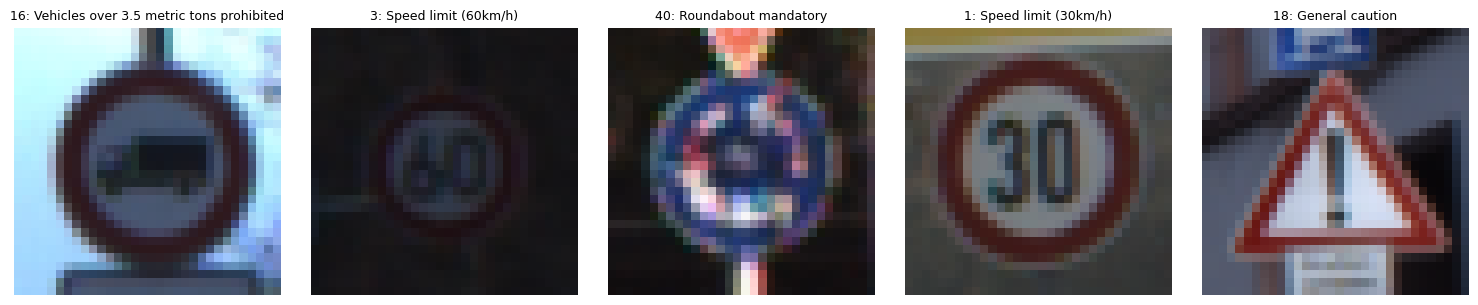

In [ ]:
# === GTSRB Label to Class Name Mapping (43 classes) ===
label_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}


import matplotlib.pyplot as plt
import random

# === Select 5 random indices ===
indices = random.sample(range(len(X_train)), 5)

# === Create a horizontal plot ===
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    label_id = y_train[idx]
    label_text = label_names.get(label_id, "Unknown")

    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f"{label_id}: {label_text}", fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Auto-Training Pipeline for German Traffic Signs (PyTorch)

This is a **complete automated training pipeline** using PyTorch for the German Traffic Sign dataset, based on the `.p` files format from [saadhaxxan/germantrafficsigns (Kaggle)](https://www.kaggle.com/datasets/saadhaxxan/germantrafficsigns).

### Main Features

* **Loads pickle files**: `train.p`, `test.p`, and `valid.p` from a specified directory.
* **Detects and maps unique class labels** across the dataset, re-indexes them dynamically.
* **Data augmentation**: Rotation and horizontal flip for training images.
* **Model**: MobileNetV2 with a final linear layer adapted to the number of detected classes.
* **Class balancing**: Uses `WeightedRandomSampler` to address class imbalance.
* **Metrics tracking**:

  * Tracks **training accuracy** and **validation F1** per epoch.
  * Evaluates **test F1** and prints the full classification report.
* **Visualizations**:

  * Confusion Matrix using `seaborn`.
  * Accuracy and F1 score curves across epochs using `matplotlib`.
* **Model saving**:

  * Model is saved with a filename including:

    * Number of classes
    * Class IDs
    * Timestamp
    * Final test F1 score


Epoch 01: Train Acc 85.92% | Val F1 0.818
Epoch 02: Train Acc 97.44% | Val F1 0.838
Epoch 03: Train Acc 98.04% | Val F1 0.862
Epoch 04: Train Acc 98.42% | Val F1 0.824
Epoch 05: Train Acc 98.57% | Val F1 0.852
Epoch 06: Train Acc 98.78% | Val F1 0.878
Epoch 07: Train Acc 98.75% | Val F1 0.834
Epoch 08: Train Acc 99.17% | Val F1 0.874
Epoch 09: Train Acc 99.10% | Val F1 0.871
Epoch 10: Train Acc 98.99% | Val F1 0.874
Epoch 11: Train Acc 99.30% | Val F1 0.858
Epoch 12: Train Acc 99.11% | Val F1 0.883
Epoch 13: Train Acc 99.18% | Val F1 0.861
Epoch 14: Train Acc 99.39% | Val F1 0.853
Epoch 15: Train Acc 99.26% | Val F1 0.876
Epoch 16: Train Acc 99.50% | Val F1 0.873
Epoch 17: Train Acc 99.24% | Val F1 0.882
Epoch 18: Train Acc 99.42% | Val F1 0.898
Epoch 19: Train Acc 99.51% | Val F1 0.863
Epoch 20: Train Acc 99.53% | Val F1 0.865
✅ Test F1: 0.9145052375315962
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.

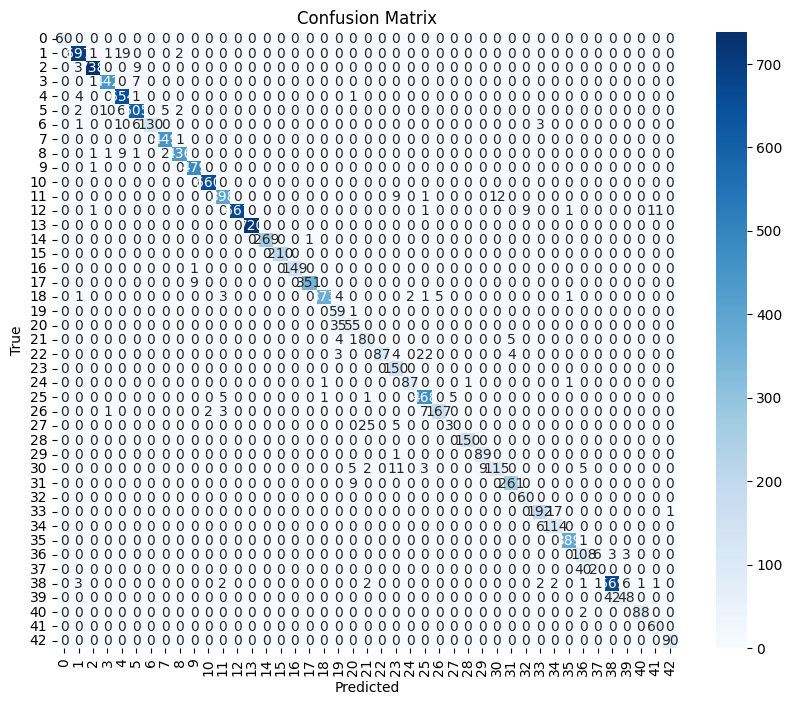

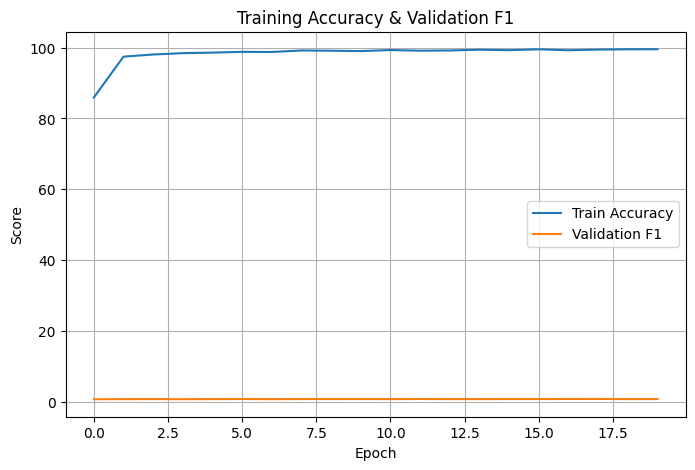

✅ Model saved: mobilenet_43classes_0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24_25_26_27_28_29_30_31_32_33_34_35_36_37_38_39_40_41_42_20250806_1044_f1_0.915.pt


In [4]:
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# === Paths ===
PKL_DIR = "/content/gtsrb_extracted"
TRAIN_P = os.path.join(PKL_DIR, "train.p")
TEST_P = os.path.join(PKL_DIR, "test.p")
VALID_P = os.path.join(PKL_DIR, "valid.p")
MODEL_DIR = "/content/models"
os.makedirs(MODEL_DIR, exist_ok=True)

# === Load Pickle ===
def load_pkl(path):
    with open(path, "rb") as f:
        data = pickle.load(f)
    return np.array(data["features"]), np.array(data["labels"])

# === Dataset Class ===
class GTSRBDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.fromarray(self.images[idx])
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

# === Transforms ===
transform_train = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
transform_test = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# === Load Data ===
X_train_all, y_train_all = load_pkl(TRAIN_P)
X_test_all, y_test_all   = load_pkl(TEST_P)
X_val_all, y_val_all     = load_pkl(VALID_P)

unique_labels = sorted(set(y_train_all))
label2idx = {label: i for i, label in enumerate(unique_labels)}

def map_and_filter(X, y):
    idx = [i for i, lbl in enumerate(y) if lbl in unique_labels]
    return X[idx], np.array([label2idx[lbl] for lbl in y[idx]])

X_train, y_train = map_and_filter(X_train_all, y_train_all)
X_val, y_val     = map_and_filter(X_val_all, y_val_all)
X_test, y_test   = map_and_filter(X_test_all, y_test_all)

# === Datasets / Loaders ===
train_ds = GTSRBDataset(X_train, y_train, transform_train)
val_ds   = GTSRBDataset(X_val, y_val, transform_test)
test_ds  = GTSRBDataset(X_test, y_test, transform_test)

weights = 1. / np.bincount(y_train)
sample_weights = [weights[label] for label in y_train]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

train_loader = DataLoader(train_ds, batch_size=64, sampler=sampler)
val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False)

# === Model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.mobilenet_v2(weights="DEFAULT")
model.classifier[1] = nn.Linear(model.last_channel, len(unique_labels))
model.to(device)

# === Training ===
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

train_accs, val_f1s = [], []

for epoch in range(20):
    model.train()
    correct, total = 0, 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, pred = outputs.max(1)
        total += labels.size(0)
        correct += pred.eq(labels).sum().item()
    acc = 100 * correct / total
    train_accs.append(acc)

    # Validation
    model.eval()
    val_preds, val_targets = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, pred = outputs.max(1)
            val_preds.extend(pred.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())
    val_f1 = f1_score(val_targets, val_preds, average="macro")
    val_f1s.append(val_f1)

    print(f"Epoch {epoch+1:02d}: Train Acc {acc:.2f}% | Val F1 {val_f1:.3f}")

# === Final Test ===
model.eval()
test_preds, test_targets = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, pred = outputs.max(1)
        test_preds.extend(pred.cpu().numpy())
        test_targets.extend(labels.cpu().numpy())

test_f1 = f1_score(test_targets, test_preds, average="macro")
print("✅ Test F1:", test_f1)
print(classification_report(test_targets, test_preds))

# === Confusion Matrix ===
cm = confusion_matrix(test_targets, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# === Accuracy / F1 plot ===
plt.figure(figsize=(8, 5))
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_f1s, label="Validation F1")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Training Accuracy & Validation F1")
plt.grid()
plt.legend()
plt.show()

# === Save model ===
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
label_str = "_".join(map(str, unique_labels))
model_name = f"mobilenet_{len(unique_labels)}classes_{label_str}_{timestamp}_f1_{test_f1:.3f}.pt"
torch.save(model.state_dict(), os.path.join(MODEL_DIR, model_name))
print("✅ Model saved:", model_name)
